In [153]:
import pathlib
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
# Parameters for the normal distribution
mean = 0     # Mean of the distribution
std_dev = 1  # Standard deviation of the distribution
num_samples = 1000  # Number of data points

# Generate the normally distributed dataset
normal_data = np.round(np.random.normal(loc=mean, scale=std_dev, size=num_samples), 4)
right_skewed = np.round(np.random.lognormal(mean=mean, sigma=std_dev, size=num_samples), 4)
left_skewed = -right_skewed

df = pd.DataFrame({'normal': normal_data, 'right': right_skewed, 'left': left_skewed})
df.sample(3)

,normal,right,left
674,0.6327,1.9755,-1.9755
157,-0.8140,0.5584,-0.5584
454,0.0051,0.3065,-0.3065


### Z-score - Univariate Technique
Assumption: The distribution of data should be normal or some sort of normal.

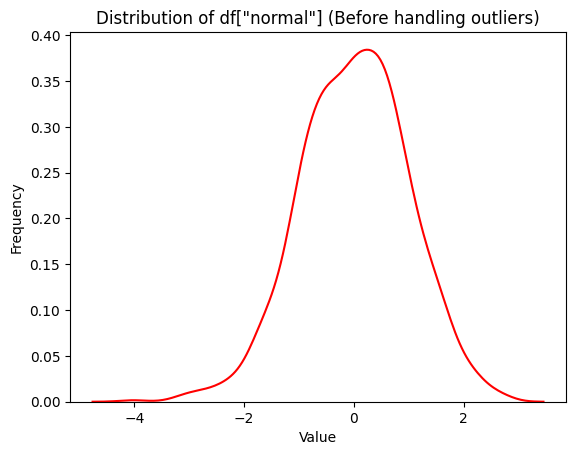

In [164]:
# Plot a histogram of the generated data
sns.kdeplot(df['normal'], color='red')
plt.title('Distribution of df["normal"] (Before handling outliers)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [165]:
mean = df['normal'].mean()
std = df['normal'].std()
min = df['normal'].min()
max = df['normal'].max()
ul = mean + 2.5 * std    # 2.5 std for testing purpose only
ll = mean - 2.5 * std

print(f'Mean: {mean}')
print(f'Std: {std}')
print(f'Min: {min}')
print(f'Max: {max}')
print(f'Upper Limit: {ul}')
print(f'Lower Limit: {ll}')

Mean: 0.011857600000000008
Std: 0.9825747657417793
Min: -4.0208
Max: 2.7135
Upper Limit: 2.468294514354448
Lower Limit: -2.4445793143544483


Now we've 2 options:
- Trimming - remove the data
    - Problems:
        - Information lose
- Capping - cap the data at max & min values
    - Problems:
        - Tails of distribution will become fatty (kustosis)

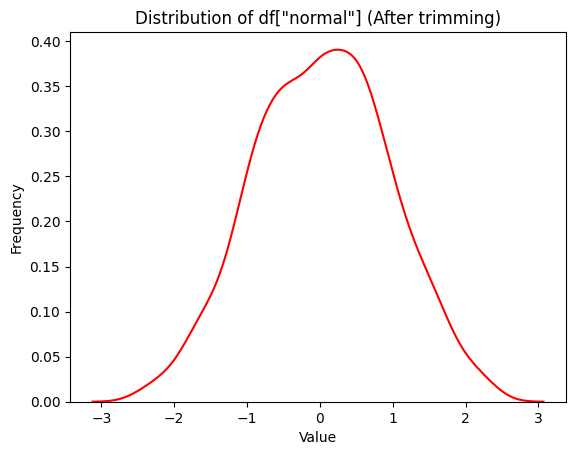

In [166]:
# Trimming
trimmed_df = df[(df['normal'] >= ll) & (df['normal'] <= ul)]

# Plot a histogram of the generated data
sns.kdeplot(trimmed_df['normal'], color='red')
plt.title('Distribution of df["normal"] (After trimming)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [158]:
# capping using clip() function
# df['normal'] = df['normal'].clip(lower=ll, upper=ul)

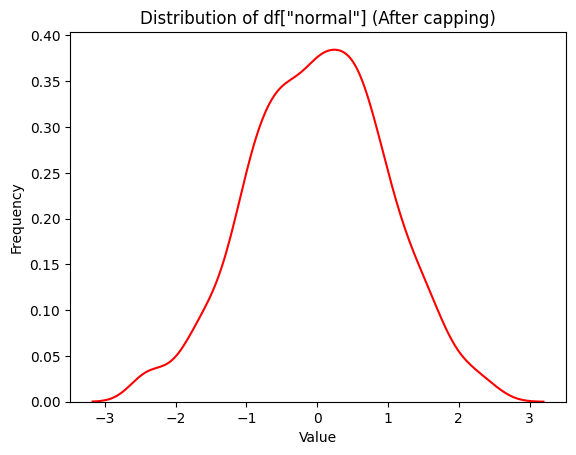

In [195]:
# capping using where() function
# cond - it'll keep only "cond" values remaining will be replaced by "other"

df_capped = df['normal'].where(cond = df['normal']>=ll, other=ll)
df_capped = df_capped.where(cond = df['normal']<=ul, other=ul) 

# Plot a histogram of the generated data
sns.kdeplot(df_capped, color='red')
plt.title('Distribution of df["normal"] (After capping)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<Figure size 640x480 with 0 Axes>

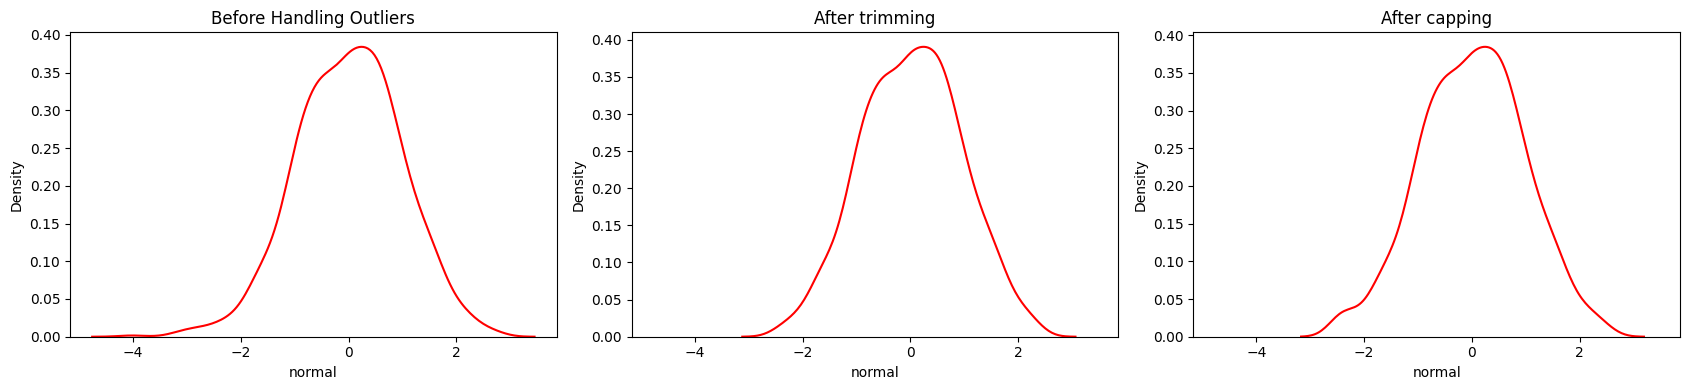

In [199]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (17, 4), sharex = True)

sns.kdeplot(df['normal'], color='red', ax=ax[0])
ax[0].set_title('Before Handling Outliers')
sns.kdeplot(trimmed_df['normal'], color='red', ax=ax[1])
ax[1].set_title('After trimming')
sns.kdeplot(df_capped, color='red', ax=ax[2])
ax[2].set_title('After capping')
fig.tight_layout()     # adjust the margins and all
plt.show()

### IQR Technique (Univariate)